In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('eval.csv',names=['PANAS 1','PANAS 2','Affect Balance','CUQ']) # load the dataset into a dataFrame

In [3]:
#df = df.drop(['PANAS 1','PANAS 2'], axis = 1) 

In [4]:
df.head() # return the first 5 rows

,PANAS 1,PANAS 2,Affect Balance,CUQ
0,15,15,0,75.0
1,9,8,-1,57.8
2,14,16,2,73.4
3,16,20,4,65.6
4,6,11,5,85.9


In [5]:
df.shape # return the shape of data

(17, 4)

In [6]:
df.describe() # return the description of the numerical values

,PANAS 1,PANAS 2,Affect Balance,CUQ
count,17.000000,17.000000,17.000000,17.000000
mean,9.705882,12.764706,3.058824,67.100000
std,5.405607,4.956428,4.980846,15.362129
min,0.000000,6.000000,-6.000000,26.600000
25%,6.000000,8.000000,0.000000,62.500000
50%,8.000000,13.000000,3.000000,68.800000
75%,14.000000,16.000000,6.000000,78.100000
max,20.000000,20.000000,15.000000,85.900000


In [7]:
df.info() # return the data types associated with each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PANAS 1         17 non-null     int64  
 1   PANAS 2         17 non-null     int64  
 2   Affect Balance  17 non-null     int64  
 3   CUQ             17 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 672.0 bytes


In [8]:
df.isnull().sum() # check if there are missing values

PANAS 1           0
PANAS 2           0
Affect Balance    0
CUQ               0
dtype: int64

In [9]:
def mood_result(x):
    if x < 0:
        return 'Decreased'
    elif x == 0:
        return 'No Change'
    else:
        return 'Increased'

In [10]:
df['Mood Result'] = df['Affect Balance'].apply(mood_result)

In [11]:
df = df.drop(['PANAS 1','PANAS 2'], axis = 1)

In [12]:
df.head()

,Affect Balance,CUQ,Mood Result
0,0,75.0,No Change
1,-1,57.8,Decreased
2,2,73.4,Increased
3,4,65.6,Increased
4,5,85.9,Increased


In [13]:
df['Mood Result'].value_counts() # return a series containing counts of unique rows

Increased    12
Decreased     3
No Change     2
Name: Mood Result, dtype: int64

<AxesSubplot:xlabel='Mood Result', ylabel='count'>

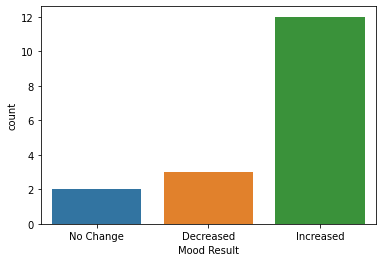

In [26]:
sns.countplot(df['Mood Result']) # plot the distribution of ocean_proximity

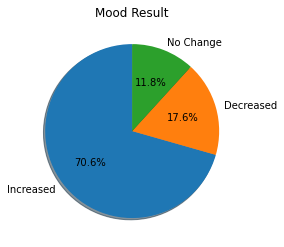

In [24]:
# plot a pie chart
data = [12,3,2]
label = ['Increased','Decreased','No Change']
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Mood Result')
plt.show()

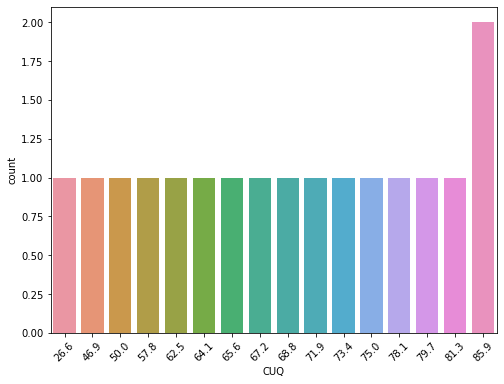

In [16]:
plt.figure(figsize=(8,6))
fig = sns.countplot(data=df,x='CUQ')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.show()

[Text(0, 0, '(19.999, 40.0]'),
 Text(1, 0, '(40.0, 60.0]'),
 Text(2, 0, '(60.0, 80.0]'),
 Text(3, 0, '(80.0, 100.0]')]

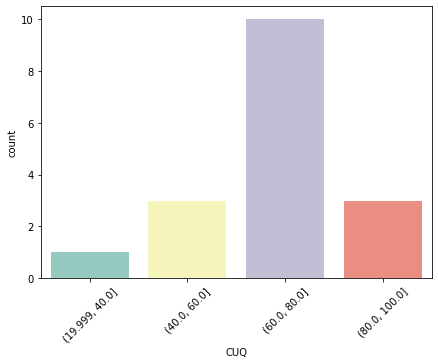

In [27]:
out = pd.cut(df['CUQ'], bins =[20,40,60,80,100], include_lowest = True)
plt.figure(figsize=(7,5))
fig = sns.countplot(out,palette='Set3')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

In [18]:
corr = df.corr() # Pearson correlation coefficient

<AxesSubplot:>

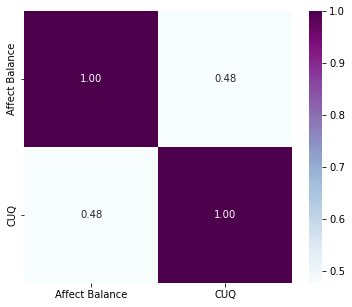

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap='BuPu',lw=0,linecolor='white',fmt='0.2f')

In [20]:
corr2 = df.corr(method='spearman') # Spearman rank correlation coefficient

In [28]:
corr2

,Affect Balance,CUQ
Affect Balance,1.000000,0.399509
CUQ,0.399509,1.000000


<AxesSubplot:>

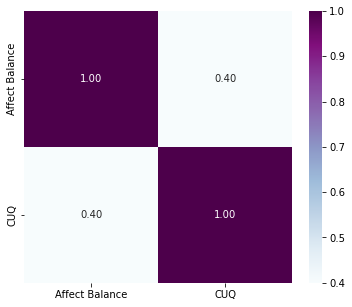

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(corr2,annot=True,cmap='BuPu',lw=0,linecolor='white',fmt='0.2f')